# 로지스틱 회귀 실습

In [1]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 
import pandas as pd # pandas package
import numpy as np # numpy package 
import scipy as sp # Scipy Package 
from scipy import stats # Scipy Package 
from sklearn import datasets # sklearn dataset 
from sklearn.model_selection import train_test_split # 데이터셋 분리
# 시각화 패키지
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline
# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' : # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

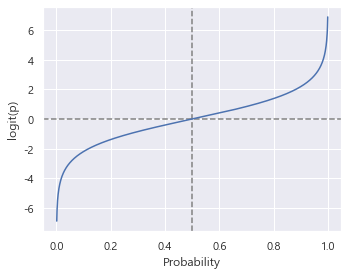

In [2]:
## 로짓 펑션 시각화
p = np.arange(0.001, 1, 0.001)

logit_df = pd.DataFrame({
    'p' : p,
    'logit' : np.log(p / (1-p)),
    'odds' : p / (1-p),
})

fig, ax = plt.subplots(figsize = (5,4))
ax.axhline(0, color = 'grey', linestyle = '--')
ax.axvline(0.5, color = 'grey', linestyle = '--')
ax.plot(logit_df['p'], logit_df['logit'])
ax.set_xlabel("Probability")
ax.set_ylabel("logit(p)")

plt.tight_layout()
plt.show()

# 닿지 않는 무한대가 나온다.

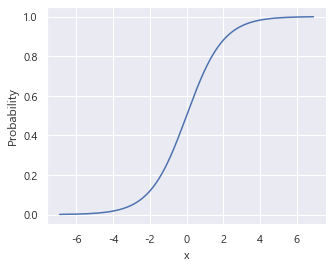

In [3]:
## logitstic Function  = sigmoid
x = logit_df['logit']
phi = 1 / (1 + np.exp(-x)) # x :판별함수
plt.figure(figsize = (5,4))

plt.plot(x, phi)
plt.xlabel('x')
plt.ylabel("Probability")

plt.show()

In [4]:
# 사례 결과 확인
phi = 1 / (1 + np.exp(-2))
print(phi)

# 0에서 1사이의 값을 가진다.

0.8807970779778823


# 이항 로지스틱 회귀 실습
- 위스콘신 유방암 데이터셋 이용

In [5]:
## 데이터셋 로드
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# 독립변수 input data
b_input_data = data.data

# 종양 : target data
# 악성 (0) mal , 양성(1) benign
b_target_data = data.target

# 종양 구분
tumar = data.target_names

# 속성 명칭
feature_names = data.feature_names

print('종양 여부 결정 속성 : {}'.format(feature_names))
print("종양 구분 : {}".format(tumar))

breast_df = pd.DataFrame(b_input_data, columns = feature_names)
breast_df['target'] = b_target_data

# 속성명 공백에 "_" 달기
breast_df.columns = [col.replace(" ","_") for col in breast_df.columns]

종양 여부 결정 속성 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
종양 구분 : ['malignant' 'benign']


In [6]:
## 데이터 확인
# 데이터 차원
print(breast_df.shape)
# label 데이터 비율 확인
breast_df['target'].value_counts()

(569, 31)


1    357
0    212
Name: target, dtype: int64

In [10]:
## 학습 데이터셋 생성
# 평균 관련된 3개의 속성으로 종양 여부 판단
model_feature_name = ['mean_radius', 'mean_texture', 'mean_perimeter']
X = breast_df[model_feature_name]
Y = breast_df['target']

# 80% 데이터를 학습 데이터로, 20% 를 테스트 데이터로.
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.2, random_state= 20)

## 표준화 데이터 스케일링
from sklearn.preprocessing import StandardScaler

## 스케일링 & 정규화
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(X_test)

# 로지스틱회귀
- from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

## 반복횟수(max_iter)를 100으로 지정한 로지스틱 회귀모델
lr = LogisticRegression(max_iter = 100)

lr.fit(train_scaled, y_train)

## 테스트 데이터 정확도확인
# 결과 확인
print("test데이터셋 정확도 : ", lr.score(test_scaled, y_test))

test데이터셋 정확도 :  0.9298245614035088


In [12]:
## 회귀계수 확인
print("coefficient : \n", lr.coef_)
print()
print("intercept : \n", lr.intercept_)

coefficient : 
 [[-0.57412744 -0.95219005 -2.85929651]]

intercept : 
 [0.75640782]


In [15]:
## 테스트 데이터 각 클래스별 확률 확인
# 어떤 클래스가 있는 지 확인
print("Class : ", lr.classes_)

# 테스트 데이터
print("테스트 데이터 : \n", test_scaled[:5])

# 테스트 데이터의 각 클래스 확률 확인
print("테스트 데이터의 각 클래스 확률 : \n", lr.predict_proba(test_scaled[:5]))

## 테스트 데이터 에측 결과
Y_pred = lr.predict(test_scaled[:5])
print("예측결과 : ", Y_pred)

Class :  [0 1]
테스트 데이터 : 
 [[-0.96666522  0.32786912 -0.93579507]
 [ 0.4242379   0.0712003   0.33778671]
 [ 1.28148839  1.52735117  1.37335484]
 [-0.60048868  2.32022913 -0.63222328]
 [ 0.02115985  1.19698535  0.04006087]]
테스트 데이터의 각 클래스 확률 : 
 [[0.02472466 0.97527534]
 [0.62733186 0.37266814]
 [0.99532336 0.00467664]
 [0.33190545 0.66809455]
 [0.62481681 0.37518319]]
예측결과 :  [1 0 0 1 0]


In [16]:
## 판별함수 (Decision_function) 으로 z값 산출
# 테스트 데이터 확인
print("테스트 데이터 : \n", test_scaled[:5])

# 이진 분류의 decision_function 은 1 클래스(양성)에 대응하는 값을 반환
decision = lr.decision_function(test_scaled[:5])
print()
print("decision_function = ", np.round(decision[:5], decimals = 2))
print()
# 로지스틱 함수 양성(1) 클래스의 확률
phi = 1 / (1 + np.exp(-decision))

# 로지스틱 함수 악성(0) 클래스의 확률
n_phi = 1 - (phi)

print("클래스1 확률 : ", phi)
print("클래스0 확률 : ", n_phi)

테스트 데이터 : 
 [[-0.96666522  0.32786912 -0.93579507]
 [ 0.4242379   0.0712003   0.33778671]
 [ 1.28148839  1.52735117  1.37335484]
 [-0.60048868  2.32022913 -0.63222328]
 [ 0.02115985  1.19698535  0.04006087]]

decision_function =  [ 3.67 -0.52 -5.36  0.7  -0.51]

클래스1 확률 :  [0.97527534 0.37266814 0.00467664 0.66809455 0.37518319]
클래스0 확률 :  [0.02472466 0.62733186 0.99532336 0.33190545 0.62481681]


In [19]:
## 모델 평가
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 에측값
Y_pred = lr.predict(test_scaled)

# 성능 리포트값 출력
print(classification_report(y_test, lr.predict(test_scaled)))

# 주요 성능 지표
print()
print('confusion matrix = \n', confusion_matrix(y_true = y_test, y_pred=Y_pred))
print()
print('accuracy = \n', accuracy_score(y_true = y_test, y_pred=Y_pred))
print('precision = \n', precision_score(y_true = y_test, y_pred=Y_pred))
print('recall = \n', recall_score(y_true = y_test, y_pred=Y_pred)) # 재현율
print('f1 score = \n', f1_score(y_true = y_test, y_pred=Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        48
           1       0.93      0.95      0.94        66

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


confusion matrix = 
 [[43  5]
 [ 3 63]]

accuracy = 
 0.9298245614035088
precision = 
 0.9264705882352942
recall = 
 0.9545454545454546
f1 score = 
 0.9402985074626866


Text(0.5, 1.0, 'Confusion Matrix')

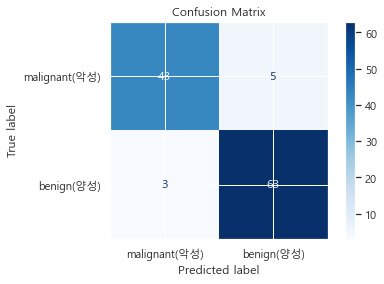

In [20]:
# 시각화
# Confusion_matrix
from sklearn.metrics import plot_confusion_matrix

labels = ['malignant(악성)', 'benign(양성)']
disp = plot_confusion_matrix(lr, test_scaled, y_test, 
                            display_labels = labels,
                            cmap = plt.cm.Blues,
                            normalize = None)
disp.ax_.set_title('Confusion Matrix')

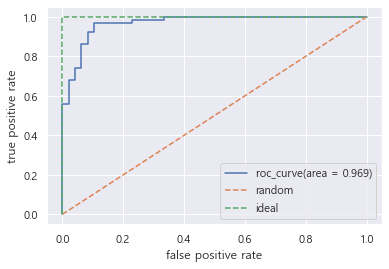

auc =  0.9690656565656566


In [23]:
## ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score, auc

# 검증 데이터가 클래스 1에 해당하는 데이터
Y_score = lr.predict_proba(test_scaled)[:,1]

fpr,tpr,thresholds = roc_curve(y_true = y_test, y_score=Y_score)

plt.plot(fpr,tpr,label = 'roc_curve(area = %0.3f)' % auc(fpr,tpr))
plt.plot([0,1], [0,1], linestyle = '--', label = 'random')
plt.plot([0,0,1], [0,1,1], linestyle = '--', label = 'ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

# AUC score
print('auc = ', roc_auc_score(y_true=y_test, y_score=Y_score))

- statsmodel 이용한 Logistic Regression

In [24]:
## 로지스틱 모델 적합, y = F(x)
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(train_scaled)

model_s = sm.Logit(y_train, X)

results = model_s.fit()

Optimization terminated successfully.
         Current function value: 0.195275
         Iterations 9


In [25]:
## 결과 리포트
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Tue, 06 Sep 2022   Pseudo R-squ.:                  0.7013
Time:                        13:56:59   Log-Likelihood:                -88.850
converged:                       True   LL-Null:                       -297.42
Covariance Type:            nonrobust   LLR p-value:                 4.288e-90
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6509      0.199      3.265      0.001       0.260       1.042
x1            22.3298      4.085      5.467      0.000      14.324      30.336
x2            -1.0898      0.218     -4.994      0.000      -1.518      -0.662
x3           -26.8748      4.368     -6.153      0.000     -35.435     -18.314
==============================================================================
"""

In [26]:
# 로지스틱의 log 형태가 취해진 결과
results.params

const     0.650922
x1       22.329805
x2       -1.089819
x3      -26.874841
dtype: float64

In [28]:
# 시그모이드
np.exp(results.params)

const    1.917308e+00
x1       4.985529e+09
x2       3.362773e-01
x3       2.130124e-12
dtype: float64

In [32]:
# 5개 테스트셋 예측
test_scaled[:5]

array([[-0.96666522,  0.32786912, -0.93579507],
       [ 0.4242379 ,  0.0712003 ,  0.33778671],
       [ 1.28148839,  1.52735117,  1.37335484],
       [-0.60048868,  2.32022913, -0.63222328],
       [ 0.02115985,  1.19698535,  0.04006087]])

In [33]:
# 상수항 추가
X_test = sm.add_constant(test_scaled)

In [34]:
# 예측 ( 클래스가 1일 확률 )
results.predict(X_test[:5])

array([9.79316159e-01, 7.24822900e-01, 9.07854265e-05, 8.46108119e-01,
       2.21368457e-01])

# 다항 로지스틱 회귀

In [ ]:
## iris 데이터셋 로드
data = datasets.load_iris()

# 꽃의 특징 (input data)
t_input_data = data['data']
